In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colors import ListedColormap
%matplotlib inline 

In [5]:
pip install lasio


In [6]:
import lasio

In [7]:
from google.colab import files
uploaded = files.upload()

Saving 15_9-19_BT2_CPI.las to 15_9-19_BT2_CPI.las


In [8]:
las = lasio.read("15_9-19_BT2_CPI.las")

In [11]:
las.keys()

['DEPTH',
 'BVW',
 'CARB_FLAG',
 'COAL_FLAG',
 'KLOGH',
 'KLOGV',
 'PHIF',
 'RHOFL',
 'RHOMA',
 'RW',
 'SAND_FLAG',
 'SW',
 'TEMP',
 'VSH']

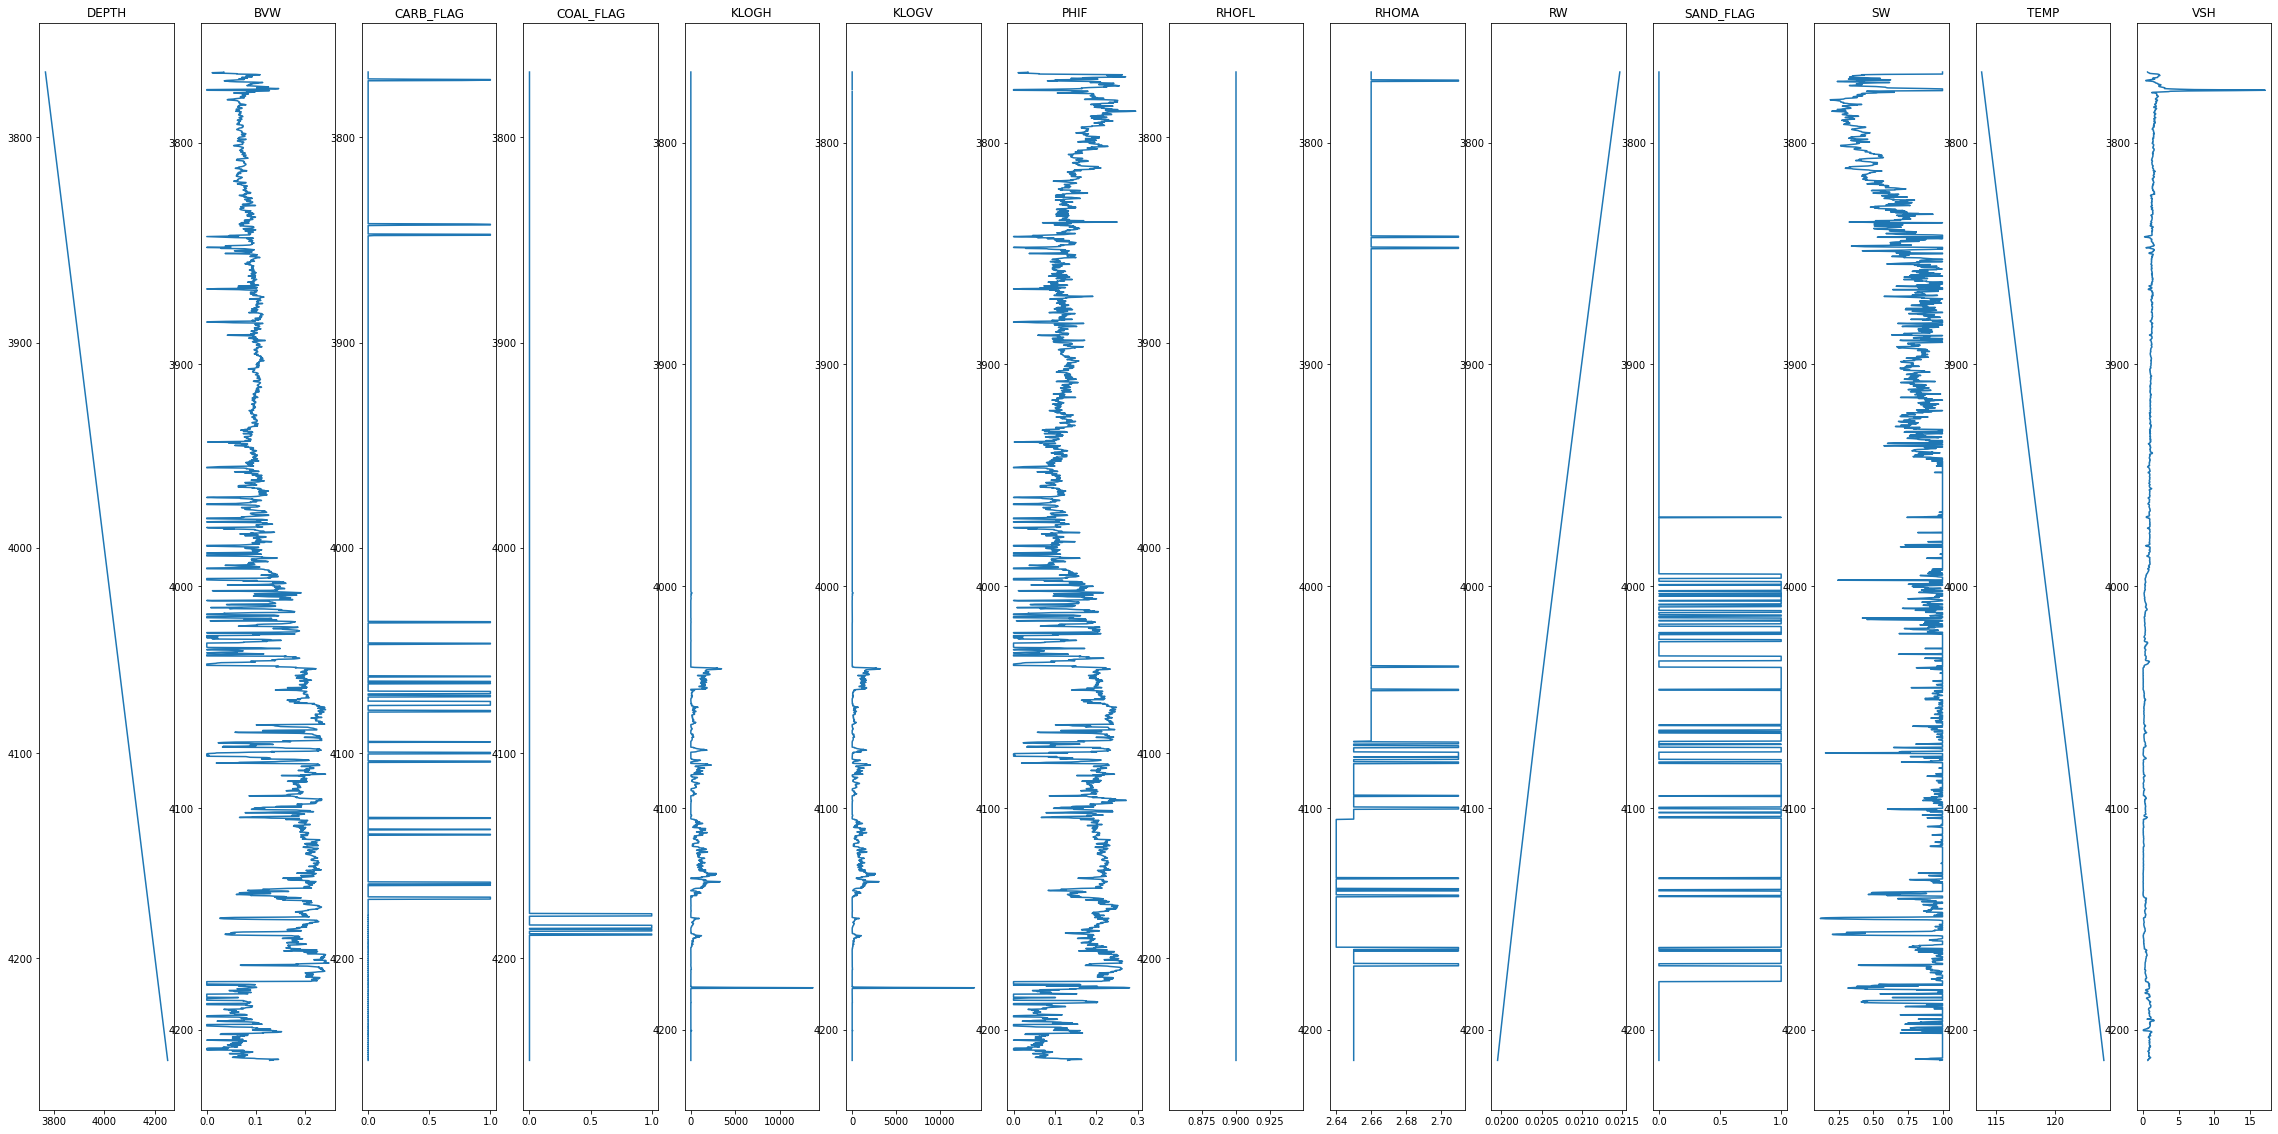

In [12]:
fig, axes = plt.subplots(1, len(las.keys()), figsize=(40,20))
for i, log in enumerate(las.keys()):
    axes[i].plot(las[log], las['DEPTH'])
    axes[i].invert_yaxis()
    axes[i].set_title(log)


In [96]:
df = las.df()

In [97]:
df.head()

,BVW,CARB_FLAG,COAL_FLAG,KLOGH,KLOGV,PHIF,RHOFL,RHOMA,RW,SAND_FLAG,SW,TEMP,VSH
DEPTH,,,,,,,,,,,,,
3768.0900,0.034643,0.0,0.0,0.0002,0.0001,0.034643,0.9,2.66,0.021472,0.0,1.0,113.7916,0.6610
3768.2424,0.032957,0.0,0.0,0.0001,0.0000,0.032957,0.9,2.66,0.021472,0.0,1.0,113.7951,0.6946
3768.3948,0.010825,0.0,0.0,0.0000,0.0000,0.010825,0.9,2.66,0.021471,0.0,1.0,113.7986,0.7812
3768.5472,0.017037,0.0,0.0,0.0000,0.0000,0.017037,0.9,2.66,0.021471,0.0,1.0,113.8022,0.9155
3768.6996,0.044282,0.0,0.0,0.0000,0.0000,0.044282,0.9,2.66,0.021470,0.0,1.0,113.8057,0.9545


In [98]:
col_list = list(df)
col_list[3], col_list[-1] = col_list[-1], col_list[3]
df.columns = col_list
df

,BVW,CARB_FLAG,COAL_FLAG,VSH,KLOGV,PHIF,RHOFL,RHOMA,RW,SAND_FLAG,SW,TEMP,KLOGH
DEPTH,,,,,,,,,,,,,
3768.0900,0.034643,0.0,0.0,0.0002,0.0001,0.034643,0.9,2.66,0.021472,0.0,1.0,113.7916,0.6610
3768.2424,0.032957,0.0,0.0,0.0001,0.0000,0.032957,0.9,2.66,0.021472,0.0,1.0,113.7951,0.6946
3768.3948,0.010825,0.0,0.0,0.0000,0.0000,0.010825,0.9,2.66,0.021471,0.0,1.0,113.7986,0.7812
3768.5472,0.017037,0.0,0.0,0.0000,0.0000,0.017037,0.9,2.66,0.021471,0.0,1.0,113.8022,0.9155
3768.6996,0.044282,0.0,0.0,0.0000,0.0000,0.044282,0.9,2.66,0.021470,0.0,1.0,113.8057,0.9545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249.2168,NaN,NaN,0.0,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN
4249.3692,NaN,0.0,0.0,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN
4249.5216,NaN,0.0,0.0,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3162 entries, 3768.09 to 4249.8264
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BVW        2926 non-null   float64
 1   CARB_FLAG  3015 non-null   float64
 2   COAL_FLAG  3162 non-null   float64
 3   VSH        2926 non-null   float64
 4   KLOGV      2921 non-null   float64
 5   PHIF       2926 non-null   float64
 6   RHOFL      3162 non-null   float64
 7   RHOMA      2926 non-null   float64
 8   RW         2926 non-null   float64
 9   SAND_FLAG  2926 non-null   float64
 10  SW         2926 non-null   float64
 11  TEMP       2926 non-null   float64
 12  KLOGH      2926 non-null   float64
dtypes: float64(13)
memory usage: 345.8 KB


In [109]:
df['BVW'].fillna((df['KLOGH'].mean()), inplace=True)
df['CARB_FLAG'].fillna((df['CARB_FLAG'].mean()), inplace=True)
df['COAL_FLAG'].fillna((df['COAL_FLAG'].mean()), inplace=True)
df['KLOGH'].fillna((df['KLOGH'].mean()), inplace=True)
df['VSH'].fillna((df['VSH'].mean()), inplace=True)
df['KLOGV'].fillna((df['KLOGV'].mean()), inplace=True)
df['PHIF'].fillna((df['PHIF'].mean()), inplace=True)
df['RHOFL'].fillna((df['RHOFL'].mean()), inplace=True)
df['RHOMA'].fillna((df['RHOMA'].mean()), inplace=True)
df['RW'].fillna((df['RW'].mean()), inplace=True)
df['SAND_FLAG'].fillna((df['SAND_FLAG'].mean()), inplace=True)
df['SW'].fillna((df['SW'].mean()), inplace=True)
df['TEMP'].fillna((df['TEMP'].mean()), inplace=True)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3162 entries, 3768.09 to 4249.8264
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BVW        3162 non-null   float64
 1   CARB_FLAG  3162 non-null   float64
 2   COAL_FLAG  3162 non-null   float64
 3   VSH        3162 non-null   float64
 4   KLOGV      3162 non-null   float64
 5   PHIF       3162 non-null   float64
 6   RHOFL      3162 non-null   float64
 7   RHOMA      3162 non-null   float64
 8   RW         3162 non-null   float64
 9   SAND_FLAG  3162 non-null   float64
 10  SW         3162 non-null   float64
 11  TEMP       3162 non-null   float64
 12  KLOGH      3162 non-null   float64
dtypes: float64(13)
memory usage: 345.8 KB


In [111]:
X = df.iloc[:,:-1].values
X

array([[3.46430000e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.13791600e+02],
       [3.29570000e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.13795100e+02],
       [1.08250000e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.13798600e+02],
       ...,
       [7.99878606e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.35269993e-01, 8.52181408e-01, 1.18974726e+02],
       [7.99878606e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.35269993e-01, 8.52181408e-01, 1.18974726e+02],
       [7.99878606e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.35269993e-01, 8.52181408e-01, 1.18974726e+02]])

In [112]:
y = df.iloc[:,-1].values
y

array([0.661     , 0.6946    , 0.7812    , ..., 0.79987861, 0.79987861,
       0.79987861])

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
y_pred = regressor.predict(X_test)

In [118]:
y_pred.shape

(633,)

In [119]:
y_test.shape

(633,)

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-2.77939469e-02 -5.17624433e-01  1.84889926e-02 -2.54509683e-03
  2.59827775e-03  3.41295745e-01  2.89309021e-09 -2.00818818e+00
  3.37552474e+04 -3.62957029e-01  7.47487566e-01  4.83805374e+00]
Mean squared error: 0.11
Coefficient of determination: 0.73


In [72]:
#################################

In [75]:
#####################################

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler =  StandardScaler().fit(X)

In [129]:
X_scaled = scaler.transform(X)


In [138]:
X_scaled.shape

(3162, 12)

In [131]:
y.shape

(3162,)

In [132]:
lr = LinearRegression()
lr.fit(X_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
x = regressor.predict(X_scaled)

In [140]:
x.shape


(3162,)

In [88]:
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 3.27450730e+02 -1.42459963e+01  6.68924518e+00 -1.69543805e+01
  1.03630612e+00 -2.82727192e+02  1.52882933e-08 -9.57033382e+02
  5.67398765e+05  3.17338581e+01 -1.68832221e+01  7.89507184e+01]


ValueError: ignored